In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
df = pd.read_csv(url)
wf = pd.read_csv(url2)

In [ ]:
df.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [ ]:
wf.head()

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


## 1. Давление и задержки
Выбираем 10% промежутков времени с самым низким давлением и 10 % с самым высоким давлением. Смотрим на задержку вылета

In [58]:
q90 = wf['pressure'].quantile(.90)
q10 = wf['pressure'].quantile(.10)  
df1 = df[["month", "day", "hour"]]
df2 = wf.loc[wf['pressure'] >= q90][["month", "day", "hour"]]
df3 = wf.loc[wf['pressure'] < q10][["month", "day", "hour"]]
presdf = pd.merge(df1.reset_index(), df2, how='inner').set_index('index')
presdf2 = pd.merge(df1.reset_index(), df3, how='inner').set_index('index')


Мат ожидание(мин) 6.494589244473771
Мединана(мин) -2.0
Общее число полетов 30310
Число полетов с задержкой 9627


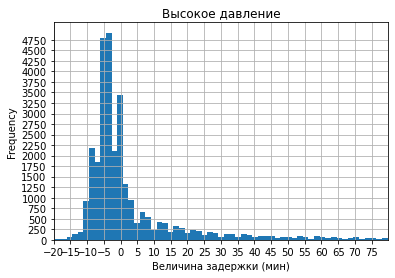

In [68]:
ax = df.iloc[presdf.index]["dep_delay"].plot.hist(bins = 800, xticks = np.arange(-20,80,5),yticks = np.arange(0, 5000, 250), xlim = [-20, 80], grid = True)
plt.xlabel("Величина задержки (мин)")
plt.title('Высокое давление')
print("Мат ожидание(мин)", df.iloc[presdf.index]["dep_delay"].mean())
print("Мединана(мин)", df.iloc[presdf.index]["dep_delay"].median())
print("Общее число полетов", len(presdf.index))
print("Число полетов с задержкой", (df.iloc[presdf.index]["dep_delay"] > 0).sum())

Мат ожидание(мин) 18.686572352184644
Мединана(мин) -1.0
Общее число полетов 28769
Число полетов с задержкой 12825


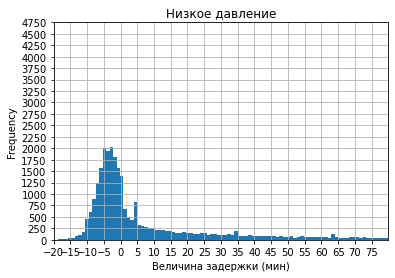

In [69]:
ax = df.iloc[presdf2.index]["dep_delay"].plot.hist(bins = 800, xticks = np.arange(-20,80,5),yticks = np.arange(0, 5000, 250), xlim = [-20, 80], grid = True)
plt.xlabel("Величина задержки (мин)")
plt.title('Низкое давление')
print("Мат ожидание(мин)", df.iloc[presdf2.index]["dep_delay"].mean())
print("Мединана(мин)", df.iloc[presdf2.index]["dep_delay"].median())
print("Общее число полетов", len(presdf2.index))
print("Число полетов с задержкой", (df.iloc[presdf2.index]["dep_delay"] > 0).sum())

Вывод: можно заметить, что при низком давлении среднее время задержки увеличивается в 3 раза, а также увеличивается на ~33% число задержанный рейсов, по сравнению с выскоим давлением

# 2. Задержки и время суток
Считаем вероятность попасть в задержку утром/днем/вечером/ночью.
Смотрим как соотносятся эти вероятности.

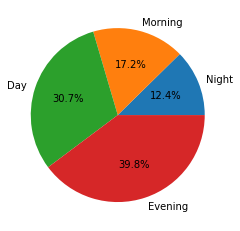

In [ ]:
night = len(df["dep_delay"][(df["dep_delay"] > 0) & (df["hour"] < 6)]) / len(df["dep_delay"][df["hour"] < 6])
morning = len(df["dep_delay"][(df["dep_delay"] > 0) & (df["hour"] >= 6) & (df["hour"] < 12)]) / len(df["dep_delay"][(df["hour"] >= 6) & (df["hour"] < 12)])
day = len(df["dep_delay"][(df["dep_delay"] > 0) & (df["hour"] >= 12) & (df["hour"] < 18)]) / len(df["dep_delay"][(df["hour"] >= 12) & (df["hour"] < 18)])
evening = len(df["dep_delay"][(df["dep_delay"] > 0) & (df["hour"] >= 18) & (df["hour"] < 24)]) / len(df["dep_delay"][(df["hour"] >= 18) & (df["hour"] < 24)])
plt.pie([night, morning, day, evening], labels = ["Night", "Morning", "Day", "Evening"], autopct='%1.1f%%')
plt.show()

Вывод: реже всего попадают в задержку ночью и утром, чаще всего днем и вечером

# 3. Доля, задержанных рейсов по месяцам

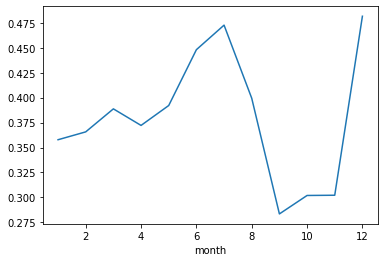

In [ ]:
(df[(df["dep_delay"] > 0)].groupby(["month"])["flight"].count() / df.groupby(["month"])["flight"].count()).plot()
plt.show()

Вывод: можно заметить, что в июле и декабре задерживаются почти половина рейсов, самым низким по доле задержек является сентябрь

# 4. Скорость ветра и задержки

Text(0.5, 0, 'Скорость ветра')

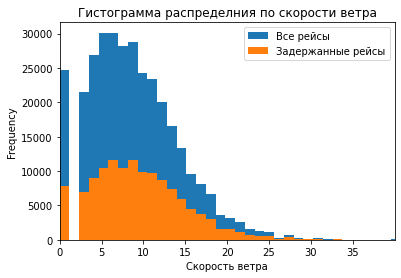

In [77]:
wf1 = wf[["month", "day", "hour"]]
wf2 = df.loc[df['dep_delay'] > 0][["month", "day", "hour"]]
wf3 = df[["month", "day", "hour"]]
delaydf = pd.merge(wf1.reset_index(), wf2, how='inner').set_index('index')
alldf = pd.merge(wf1.reset_index(), wf3, how='inner').set_index('index')
wf.iloc[alldf.index]["wind_speed"].plot.hist(bins = 900, xticks = np.arange(0,40,5), xlim = [0, 40], label='Все рейсы')
wf.iloc[delaydf.index]["wind_speed"].plot.hist(bins = 900, xticks = np.arange(0,40,5), xlim = [0, 40], label = 'Задержанные рейсы')
plt.title('Гистограмма распределния по скорости ветра')
plt.legend()
plt.xlabel('Скорость ветра')

Text(0.5, 0, 'Скорость ветра')

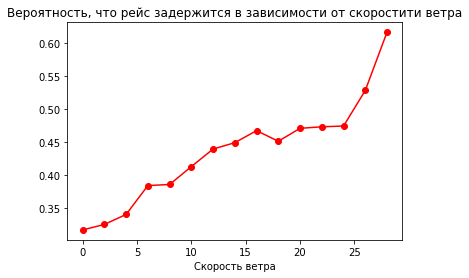

In [80]:
a = np.empty(15)
d = wf.iloc[delaydf.index]["wind_speed"]
all = wf.iloc[alldf.index]["wind_speed"]
for i in range(0, 30, 2):
  a[i//2] = ((d >= i) & (d < (i + 2))).sum() / ((all >= i) & (all < (i + 2))).sum()
plt.plot(np.arange(0, 30, 2), a, 'o-r')
plt.title('Вероятность, что рейс задержится в зависимости от скоростити ветра')
plt.xlabel('Скорость ветра')

Вывод: скорость ветра незначительно повышает вероятность задержки

# 5.Дистанция и среднее время задержки
Смотрим на среднее время задержки, в зависимости от дистанции рейса

Text(0, 0.5, 'Ср. задержка (мин)')

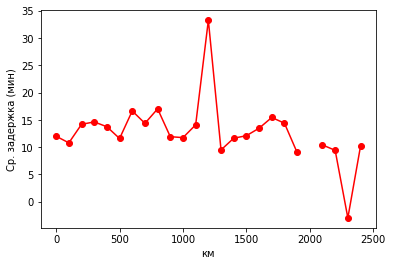

In [81]:
a = np.empty(25)
d = df["distance"]
all = wf.iloc[alldf.index]["wind_speed"]
for i in range(0, 2500, 100):
  a[i//100] = df[((d >= i) & (d < (i + 100)))]["dep_delay"].mean()
plt.plot(np.arange(0, 2500, 100), a, 'o-r')
plt.xlabel('км')
plt.ylabel('Ср. задержка (мин)')

Вывод: график не совсем равномерный, можно выделить расстояния, где задержка сильно выше нормы или где сильно ниже

# 6. Среднее время задержки и количество рейсов в это время
Смотрим как зависит среднее время задержки от загруженности аэропортов

[40.39534884 54.06493506 24.92279942 30.50043592 16.39268293 12.8336378
 11.53335875  5.36118405  2.12820513  1.52380952]


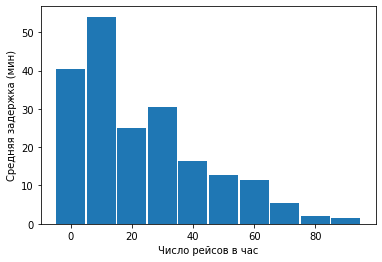

In [83]:
a = df.groupby(["month", "day", "hour"])["flight"].count().reset_index() # число самолетов в каждый час
b = df.groupby(["month", "day", "hour"])["dep_delay"].sum().reset_index() # сумма всех задержек в часе
l = np.empty(10)
for i in range(0, 100, 10):
  t = a[((a["flight"] > i) & (a["flight"] <= (i+1)))].index # номера рейсов, где количество лежит в промежутке
  sum = b.loc[t]["dep_delay"].sum() 
  count = a[((a["flight"] > i) & (a["flight"] <= (i+1)))]['flight'].sum()
  l[i // 10] = sum / count
plt.bar(np.arange(0, 100, 10), l, width = 9.5)
plt.xlabel("Число рейсов в час")
plt.ylabel("Средняя задержка (мин)")
print(l)


Вывод: чем загруженнее аэропорты, тем меньше средняя задержка

# 7. Среднее время задержки и влажность воздуха


Text(0, 0.5, 'Средняя задержка (мин)')

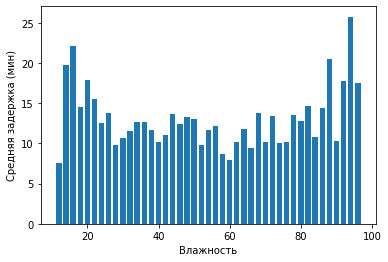

In [85]:
hum = np.empty(50)
for i in range(0, 100, 2):
  df2 = wf.loc[((wf["humid"] >= i) & (wf["humid"] < i + 2))][["month", "day", "hour"]]
  humperiods = pd.merge(df[["month", "day", "hour"]].reset_index(), df2, how='inner').set_index('index')
  hum[i // 2] = df.loc[humperiods.index]["dep_delay"].mean()
plt.bar(np.arange(0, 100, 2), hum, width = 1.5)
plt.xlabel("Влажность")
plt.ylabel("Средняя задержка (мин)")

Вывод: Слишком мальенькая и слишком высокая влажность сказываются на задержке

# 8. Задержки и направления

dest
LEX    -9.000000
PSP    -2.944444
EYW     3.647059
STT     4.613900
ACK     6.456604
         ...    
BHM    29.694853
OKC    30.568807
TUL    34.906355
CAE    35.570093
LGA          NaN
Name: dep_delay, Length: 105, dtype: float64

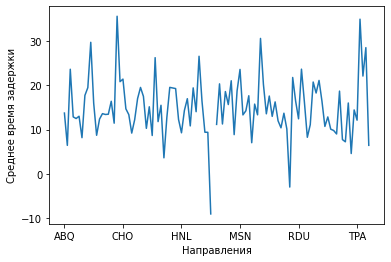

In [87]:
df.groupby("dest")["dep_delay"].mean().plot()
plt.ylabel("Среднее время задержки")
plt.xlabel("Направления")
df.groupby("dest")["dep_delay"].mean().sort_values()

Вывод: можно выделить  большой разброс между средней задежкой для направлений

# 9. Видимость и число задержек

Text(0, 0.5, 'Доля задержек')

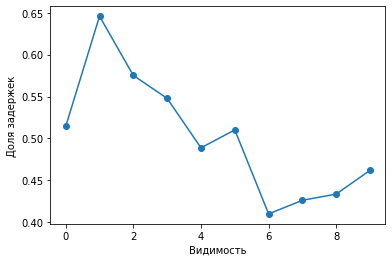

In [88]:
wf1 = wf[["month", "day", "hour"]]
wf2 = df.loc[df['dep_delay'] > 0][["month", "day", "hour"]]
wf3 = df[["month", "day", "hour"]]
delaydf = pd.merge(wf1.reset_index(), wf2, how='inner').set_index('index')
alldf = pd.merge(wf1.reset_index(), wf3, how='inner').set_index('index')
a = np.empty(10)
d = wf.iloc[delaydf.index]["visib"]
all = wf.iloc[alldf.index]["visib"]
for i in range(0, 10, 1):
  a[i] = ((d >= i) & (d < (i + 1))).sum() / ((all >= i) & (all < (i + 1))).sum()
plt.plot(np.arange(0, 10, 1), a, 'o-')
plt.xlabel("Видимость")
plt.ylabel("Доля задержек")

Text(0, 0.5, 'Среднее время задержек')

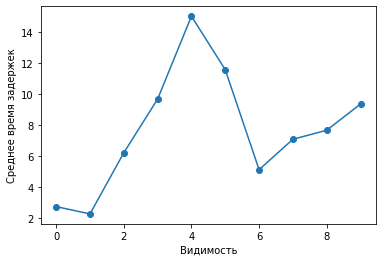

In [89]:
for i in range(0, 10, 1):
  a[i] = df.loc[d[((d >= i) & (d < (i + 1)))].index]["dep_delay"].mean()

plt.plot(np.arange(0, 10, 1), a, 'o-')
plt.xlabel("Видимость")
plt.ylabel("Среднее время задержек")

Вывод: низкая видимость повышает среднее время задержки, но наибольшее время задержки при средней видимости

# 10. Направлевния ветра и задержки
Смотрим как влияет направления ветра на среднее время задержки

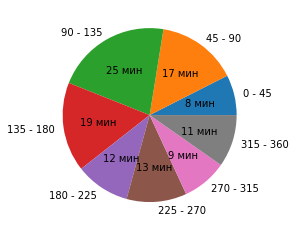

In [94]:
df1 = df[["month", "day", "hour"]]

a = np.empty(8)
for i in range(0, 360, 45):
  df2 = wf.loc[((wf['wind_dir'] >= i) & (wf["wind_dir"] < (i + 45)))][["month", "day", "hour"]]
  dirdf = pd.merge(df1.reset_index(), df2, how='inner').set_index('index')
  a[i // 45] = df.iloc[dirdf.index]["dep_delay"].mean()
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d} мин".format(absolute)
plt.pie(a, labels = ["0 - 45", "45 - 90", "90 - 135","135 - 180","180 - 225","225 - 270","270 - 315","315 - 360"],  autopct=lambda pct: func(pct, a))
plt.show()

Вывод: можно заметить, что когда ветер от 45 до 180 (т.е. ветер с востока, а т.к. это Нью-Йорк, то это океанический ветер), то время задережки выше, относительно других направлений